In [ ]:
# IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# LOADING/READING THE DATASET
# (DOWNLOADED FROM THE KAGGLE)

In [2]:
df=pd.read_csv(r'c:\Users\Aditi\Downloads\train.csv\train.csv')

In [4]:
# DISPLAYING  1ST 5 RECORDS
df.head()

,Statement,Label
0,Says the Annies List political group supports ...,FAKE
1,When did the decline of coal start? It started...,REAL
2,"Hillary Clinton agrees with John McCain ""by vo...",REAL
3,Health care reform legislation is likely to ma...,FAKE
4,The economic turnaround started at the end of ...,REAL


In [7]:
df.tail()

,Statement,Label
10235,There are a larger number of shark attacks in ...,REAL
10236,Democrats have now become the party of the [At...,REAL
10237,Says an alternative to Social Security that op...,REAL
10238,On lifting the U.S. Cuban embargo and allowing...,FAKE
10239,The Department of Veterans Affairs has a manua...,FAKE


In [ ]:
# CHEKING FOR  MISSING/NULL VALUES

In [5]:
df.isna()

,Statement,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10235,False,False
10236,False,False
10237,False,False
10238,False,False


In [ ]:
# TOTAL NO OF MISSING VALUES IN EACH COLUMN

In [6]:
df.isna().sum()

Statement    0
Label        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  object
dtypes: object(2)
memory usage: 160.1+ KB


In [11]:
df.groupby('Label').describe()

Statement                                                               
          count unique                                                top freq
Label                                                                         
FAKE       4488   4481  On changing the rules for filibusters on presi...    3
REAL       5752   5746  Four balanced budgets in a row, with no new ta...    2

In [ ]:
# ASSIGNING 0-->REAL AND 1->FAKE

In [14]:
df['FAKE']=df['Label'].apply(lambda x:1 if x=='FAKE' else 0)
df.head()

,Statement,Label,FAKE
0,Says the Annies List political group supports ...,FAKE,1
1,When did the decline of coal start? It started...,REAL,0
2,"Hillary Clinton agrees with John McCain ""by vo...",REAL,0
3,Health care reform legislation is likely to ma...,FAKE,1
4,The economic turnaround started at the end of ...,REAL,0


In [15]:
lb=df.drop('Label',axis=1)
finalr=df.Label

In [16]:
finalr.head()

0    FAKE
1    REAL
2    REAL
3    FAKE
4    REAL
Name: Label, dtype: object

In [17]:
# TRAINING THE DATASET WITH TRAINING AND TESTING DATA USING train_test_split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Statement,df.FAKE,test_size=0.30)

In [19]:
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# BUILDING A NAIVE BAYES MODEL

In [21]:
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [22]:
# EVALUATING THE MODEL

In [23]:
x_test_count=v.transform(x_test)
model.score(x_test_count,y_test)

0.6103515625

In [24]:
y_pred=model.predict(x_test_count)

In [25]:
# WE CAN ALSO CALCULATE THE ACCURACY OF THE MODEL AS GIOVEN BELOW:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6103515625
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1763
           1       0.55      0.49      0.52      1309

    accuracy                           0.61      3072
   macro avg       0.60      0.59      0.60      3072
weighted avg       0.61      0.61      0.61      3072



In [26]:
confusion_mat = confusion_matrix(y_test, y_pred)

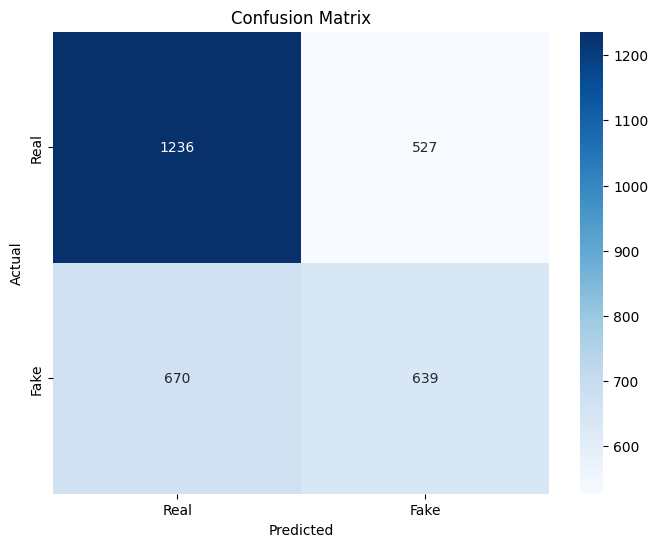

In [27]:
# PLOTTING THE CONFUSION MATRIX AS A HEATMAP
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# MAKING THE PREDICTIONS BY TAKING SOME NEW INPUTS OF NEWS
# IN THE OUTPUT (1-->FAKE , 0-->REAL)

In [33]:
news=['Four ways Bob Corker skewered Donald Trump',
     'JetNation FanDuel League; Week 4',
     'Weinstein Co board ousts Harvey Weinstein after harassment allegations',
     'EPA chief to sign rule on Clean Power Plan exit on Tuesday',
     'November 13, 2016 By 21wire Leave a Comment ',
     'Ex-Assistant FBI Director: Clintons Are a Crime Family',
     'Remy Porter Remy escaped the enterprise world and now works as a consultant.']
news_count=v.transform(news)
news_predic=model.predict(news_count)

In [34]:
for news, prediction in zip(news, news_predic):
    if prediction == 1:
        print(f"News: '{news}' is classified as FAKE.")
    else:
        print(f"News: '{news}' is classified as REAL.")

News: 'Four ways Bob Corker skewered Donald Trump' is classified as REAL.
News: 'JetNation FanDuel League; Week 4' is classified as REAL.
News: 'Weinstein Co board ousts Harvey Weinstein after harassment allegations' is classified as FAKE.
News: 'EPA chief to sign rule on Clean Power Plan exit on Tuesday' is classified as FAKE.
News: 'November 13, 2016 By 21wire Leave a Comment ' is classified as FAKE.
News: 'Ex-Assistant FBI Director: Clintons Are a Crime Family' is classified as FAKE.
News: 'Remy Porter Remy escaped the enterprise world and now works as a consultant.' is classified as REAL.
